In [3]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


<Axes: xlabel='Price', ylabel='Company'>

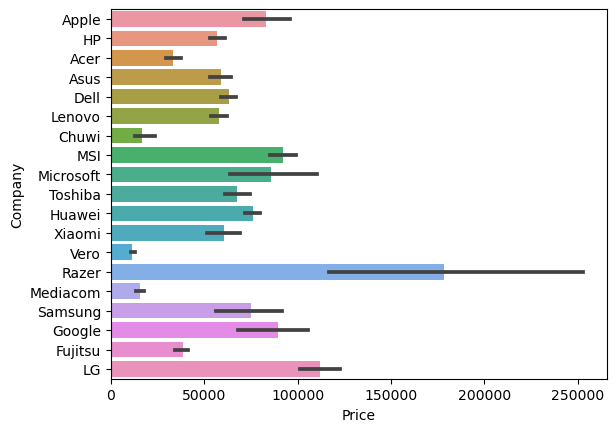

In [6]:
sb.barplot(x=df['Price'],y=df['Company'])

<Axes: xlabel='Price', ylabel='TypeName'>

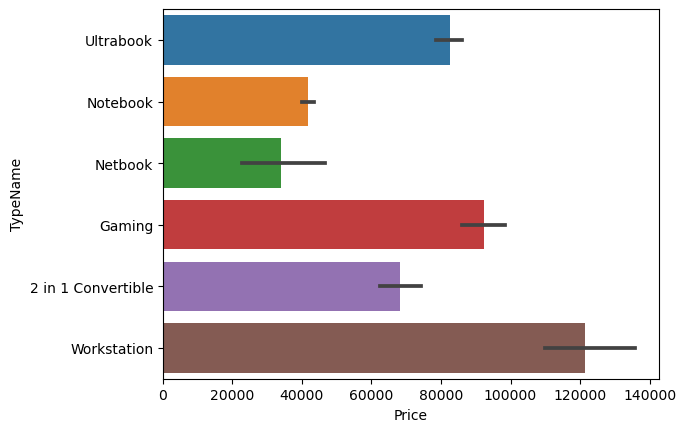

In [7]:
sb.barplot(x=df['Price'],y=df['TypeName'])

In [8]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [9]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [10]:
df['y_res'] = df['ScreenResolution'].apply(lambda x: x.split('x')[1])

In [11]:
df['x_res'] = df['ScreenResolution'].apply(lambda x: x.split('x')[0][-4:])

In [12]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [13]:
df['processor'] = df.Cpu.apply(lambda x:' '.join(x.split(' ')[0:3]))

In [20]:
df['processor'].value_counts()

processor
Intel Core i7             527
Intel Core i5             423
Other Intel processors    154
Intel Core i3             136
AMD prvessors              62
Other Processors            1
Name: count, dtype: int64

In [15]:
def fun1(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    elif 'Intel' in text:
        return 'Other Intel processors'
    elif 'AMD' in text:
        return 'AMD prvessors'
    else:
        return 'Other Processors'

In [16]:
df['processor'] = df['processor'].apply(fun1)

In [18]:
df['processor'].value_counts()

processor
Intel Core i7             527
Intel Core i5             423
Other Intel processors    154
Intel Core i3             136
AMD prvessors              62
Other Processors            1
Name: count, dtype: int64

<Axes: xlabel='Price', ylabel='processor'>

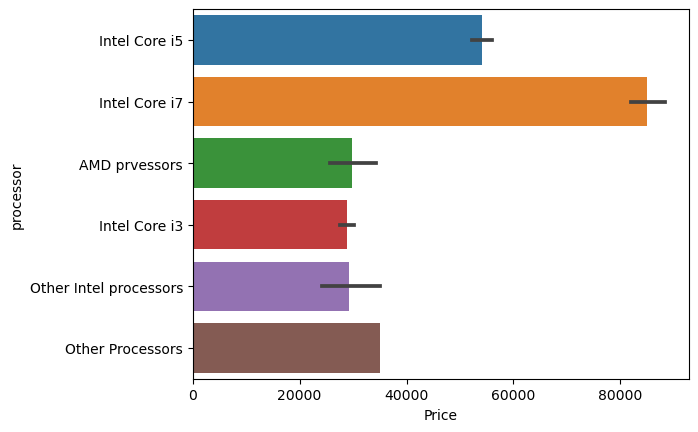

In [21]:
sb.barplot(x=df['Price'],y=df['processor'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   object 
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   object 
 9   Price        1303 non-null   float64
 10  TouchScreen  1303 non-null   int64  
 11  IPS          1303 non-null   int64  
 12  y_res        1303 non-null   object 
 13  x_res        1303 non-null   object 
 14  processor    1303 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 152.8+ KB


In [23]:
df['x_res'] = df['x_res'].astype(int)
df['y_res'] = df['y_res'].astype(int)

In [24]:
df['PPI'] = ((df['x_res']**2) + (df['y_res']**2))**0.5/df['Inches']

<Axes: xlabel='Price', ylabel='PPI'>

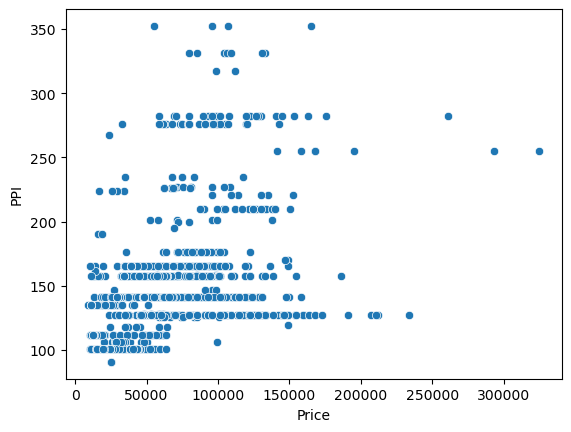

In [25]:
sb.scatterplot(x=df['Price'],y=df['PPI'])

In [26]:
df.drop(columns=['Cpu'],inplace=True)

In [27]:
df['Ram'] = df['Ram'].str[:-2].astype(int)

<Axes: xlabel='Price', ylabel='Ram'>

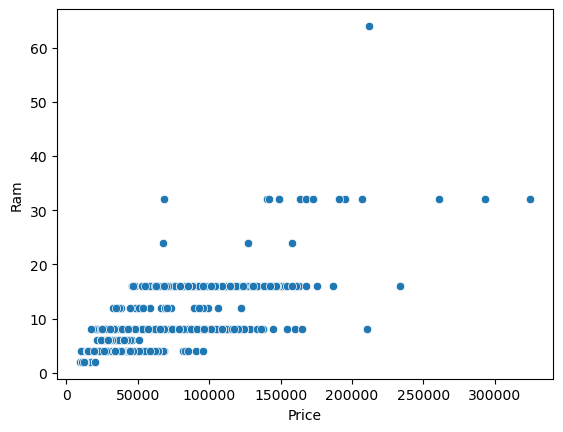

In [28]:
sb.scatterplot(x=df['Price'],y=df['Ram'])

In [29]:
def storage(memory):
    if 'SSD' in memory:
        return  'SSD'
    elif 'HDD' in memory:
        return 'HDD'
    elif 'Flash Storage' in memory:
        return 'Flash Storage'
    else:
        return 'Hybrid'

In [30]:
df['SS'] = df['Memory'].apply(storage)

In [31]:
df

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,y_res,x_res,processor,PPI,SS
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,1600,2560,Intel Core i5,226.983005,SSD
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,900,1440,Intel Core i5,127.677940,Flash Storage
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1080,1920,Intel Core i5,141.211998,SSD
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,1800,2880,Intel Core i7,220.534624,SSD
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,1600,2560,Intel Core i5,226.983005,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1,1,1080,1920,Intel Core i7,157.350512,SSD
1299,Lenovo,2 in 1 Convertible,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1,1,1800,3200,Intel Core i7,276.053530,SSD
1300,Lenovo,Notebook,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,0,0,768,1366,Other Intel processors,111.935204,Flash Storage
1301,HP,Notebook,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,0,0,768,1366,Intel Core i7,100.454670,HDD


In [32]:
df['Memory'] = df['Memory'].apply(lambda x:x.split(' ')[0])

In [33]:
def mem(memory):
    if 'GB' in memory:
        return memory.replace('GB','')
    elif 'TB' in memory:
        return memory.replace('TB','000')

In [34]:
df['Memory'] = df['Memory'].apply(mem)

In [35]:
df['Memory'].value_counts()

Memory
256       508
1000      240
128       177
512       140
500       132
32         45
64         17
2000       16
1.0000     10
16         10
180         5
240         1
8           1
508         1
Name: count, dtype: int64

In [36]:
df[df['Memory'] == '1.0000']

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,y_res,x_res,processor,PPI,SS
151,Dell,Gaming,15.6,8,1.0000,Nvidia GeForce GTX 1050,Windows 10,2.62kg,47898.7200,0,0,1080,1920,Intel Core i7,141.211998,Hybrid
1010,Dell,Gaming,15.6,8,1.0000,Nvidia GeForce GTX 1050,Windows 10,2.65kg,50562.7200,0,0,1080,1920,Intel Core i5,141.211998,Hybrid
1075,Lenovo,Notebook,17.3,8,1.0000,AMD Radeon R5 M330,Windows 10,3.0kg,35111.5200,0,0,900,1600,Intel Core i5,106.113062,HDD
1135,Lenovo,Notebook,15.6,16,1.0000,AMD Radeon R7 M360,Windows 10,2.5kg,58554.7200,0,0,1080,1920,Intel Core i7,141.211998,Hybrid
1158,Lenovo,Notebook,15.6,8,1.0000,AMD Radeon R5 M330,Windows 10,2.5kg,42010.7472,0,0,1080,1920,Intel Core i5,141.211998,Hybrid
1176,Lenovo,Notebook,15.6,4,1.0000,Intel HD Graphics 520,Windows 7,2.32kg,43956.0000,0,0,1080,1920,Intel Core i7,141.211998,Hybrid
1258,Lenovo,Notebook,15.6,8,1.0000,AMD Radeon R5 M330,Windows 7,2.32kg,47685.6000,0,0,1080,1920,Intel Core i7,141.211998,Hybrid
1266,HP,Notebook,15.6,6,1.0000,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672,0,0,1080,1920,AMD prvessors,141.211998,Hybrid
1280,HP,Notebook,15.6,6,1.0000,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672,0,0,1080,1920,AMD prvessors,141.211998,Hybrid
1294,HP,Notebook,15.6,6,1.0000,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672,0,0,1080,1920,AMD prvessors,141.211998,Hybrid


In [107]:
df1=pd.read_csv('laptop_data.csv')

In [110]:
df1.iloc[1010]

Unnamed: 0                                 1010
Company                                    Dell
TypeName                                 Gaming
Inches                                     15.6
ScreenResolution              Full HD 1920x1080
Cpu                 Intel Core i5 7300HQ 2.5GHz
Ram                                         8GB
Memory                             1.0TB Hybrid
Gpu                     Nvidia GeForce GTX 1050
OpSys                                Windows 10
Weight                                   2.65kg
Price                                  50562.72
Name: 1010, dtype: object

In [37]:
df['Memory'] = df['Memory'].replace({'1.0000':'1000'})

In [38]:
df['Memory'].value_counts()

Memory
256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: count, dtype: int64

In [39]:
df

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,y_res,x_res,processor,PPI,SS
0,Apple,Ultrabook,13.3,8,128,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,1600,2560,Intel Core i5,226.983005,SSD
1,Apple,Ultrabook,13.3,8,128,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,900,1440,Intel Core i5,127.677940,Flash Storage
2,HP,Notebook,15.6,8,256,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1080,1920,Intel Core i5,141.211998,SSD
3,Apple,Ultrabook,15.4,16,512,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,1800,2880,Intel Core i7,220.534624,SSD
4,Apple,Ultrabook,13.3,8,256,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,1600,2560,Intel Core i5,226.983005,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,128,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1,1,1080,1920,Intel Core i7,157.350512,SSD
1299,Lenovo,2 in 1 Convertible,13.3,16,512,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1,1,1800,3200,Intel Core i7,276.053530,SSD
1300,Lenovo,Notebook,14.0,2,64,Intel HD Graphics,Windows 10,1.5kg,12201.1200,0,0,768,1366,Other Intel processors,111.935204,Flash Storage
1301,HP,Notebook,15.6,6,1000,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,0,0,768,1366,Intel Core i7,100.454670,HDD


<Axes: xlabel='Price', ylabel='SS'>

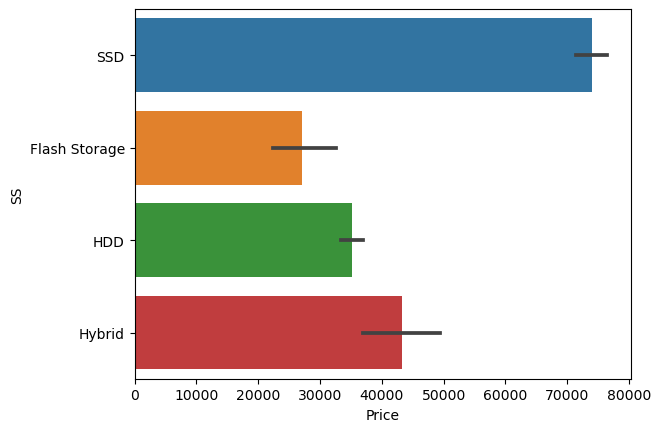

In [40]:
sb.barplot(x=df['Price'],y=df['SS'])

In [42]:
df.drop(columns=['Inches','x_res','y_res'],inplace=True)

In [43]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,processor,PPI,SS
0,Apple,Ultrabook,8,128,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,Intel Core i5,226.983005,SSD
1,Apple,Ultrabook,8,128,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,Intel Core i5,127.677940,Flash Storage
2,HP,Notebook,8,256,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,Intel Core i5,141.211998,SSD
3,Apple,Ultrabook,16,512,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,Intel Core i7,220.534624,SSD
4,Apple,Ultrabook,8,256,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,Intel Core i5,226.983005,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1,1,Intel Core i7,157.350512,SSD
1299,Lenovo,2 in 1 Convertible,16,512,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1,1,Intel Core i7,276.053530,SSD
1300,Lenovo,Notebook,2,64,Intel HD Graphics,Windows 10,1.5kg,12201.1200,0,0,Other Intel processors,111.935204,Flash Storage
1301,HP,Notebook,6,1000,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,0,0,Intel Core i7,100.454670,HDD


In [46]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [47]:
def graphics(text):
    if 'Intel HD Graphics' in text:
        return 'Intel HD Graphics'
    elif 'Intel UHD Graphics' in text:
        return 'Intel UHD Graphics'
    elif 'Nvidia' in text:
        return 'Nvidia'
    elif 'AMD' in text:
        return 'AMD'
    else:
        return 'other'

In [50]:
df['Gpu'] = df['Gpu'].apply(graphics)

<Axes: xlabel='Price', ylabel='Gpu'>

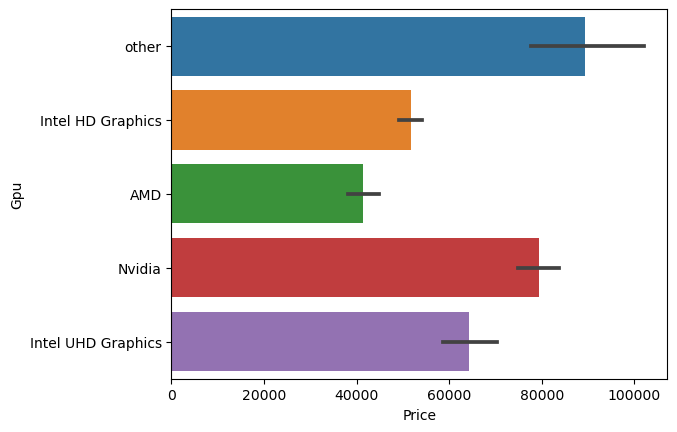

In [54]:
sb.barplot(x=df['Price'],y=df['Gpu'])

In [53]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

<Axes: xlabel='Price', ylabel='OpSys'>

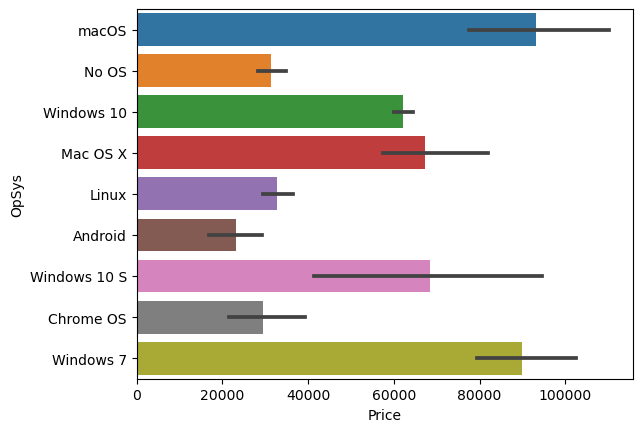

In [55]:
sb.barplot(x=df['Price'],y=df['OpSys'])

In [58]:
def oprsys(inp):
    if inp=='macOS' or inp=='Mac OS X':
        return 'mac'
    elif 'Windows' in inp:
        return 'Windows'
    else:
        return 'other/linux/no os'

In [60]:
df['OpSys'] = df['OpSys'].apply(oprsys)

<Axes: xlabel='Price', ylabel='OpSys'>

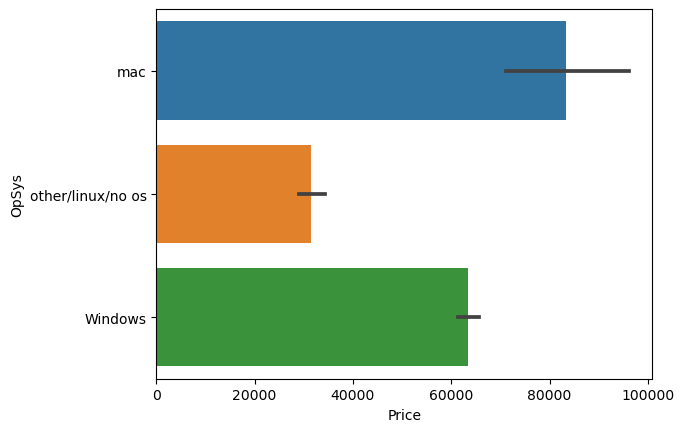

In [61]:
sb.barplot(x=df['Price'],y=df['OpSys'])

In [65]:
df['Weight'] = df['Weight'].apply(lambda x:x.replace('kg',''))

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   object 
 7   Price        1303 non-null   float64
 8   TouchScreen  1303 non-null   int64  
 9   IPS          1303 non-null   int64  
 10  processor    1303 non-null   object 
 11  PPI          1303 non-null   float64
 12  SS           1303 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(8)
memory usage: 127.4+ KB


In [93]:
df['Memory'] = df['Memory'].astype(float)


In [82]:
df['Weight']

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298     1.8
1299     1.3
1300     1.5
1301    2.19
1302     2.2
Name: Weight, Length: 1303, dtype: object

In [95]:
df['Weight'] = df['Weight'].astype(float)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   float64
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float64
 7   Price        1303 non-null   float64
 8   TouchScreen  1303 non-null   int64  
 9   IPS          1303 non-null   int64  
 10  processor    1303 non-null   object 
 11  PPI          1303 non-null   float64
 12  SS           1303 non-null   object 
dtypes: float64(4), int32(1), int64(2), object(6)
memory usage: 127.4+ KB


In [97]:
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,processor,PPI,SS
0,Apple,Ultrabook,8,128.0,other,mac,1.37,71378.6832,0,1,Intel Core i5,226.983005,SSD


In [110]:
#df.to_csv('clean_laptop.csv',index=False)

<Axes: >

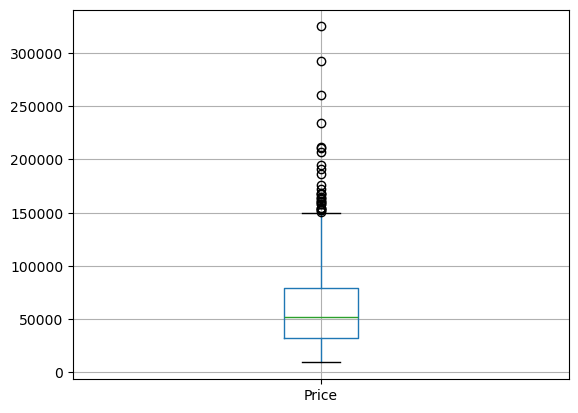

In [99]:
df.boxplot('Price')

In [107]:
df = df[df['Price']<=250000]

In [108]:
df.shape

(1300, 13)

<Axes: >

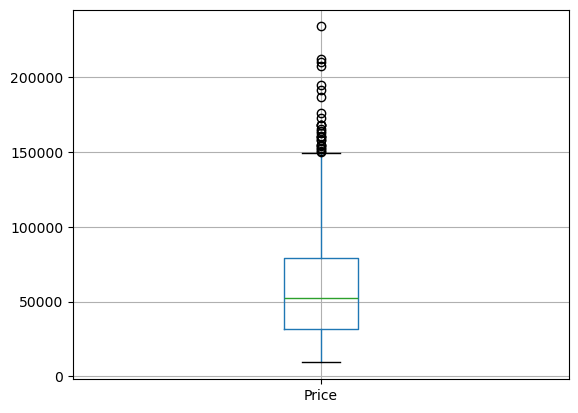

In [109]:
df.boxplot('Price')

In [117]:
df['TypeName'].replace({'2 in 1 Convertible':'Convertible'},inplace=True)

C:\Users\Aavej\AppData\Local\Temp\ipykernel_22820\1752440881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TypeName'].replace({'2 in 1 Convertible':'Convertible'},inplace=True)


In [118]:
df['TypeName'].value_counts()

TypeName
Notebook       726
Gaming         203
Ultrabook      196
Convertible    121
Workstation     29
Netbook         25
Name: count, dtype: int64

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('clean_laptop.csv')

In [6]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,processor,PPI,SS
0,Apple,Ultrabook,8,128.0,other,mac,1.37,71378.6832,0,1,Intel Core i5,226.983005,SSD
1,Apple,Ultrabook,8,128.0,Intel HD Graphics,mac,1.34,47895.5232,0,0,Intel Core i5,127.677940,Flash Storage
2,HP,Notebook,8,256.0,Intel HD Graphics,other/linux/no os,1.86,30636.0000,0,0,Intel Core i5,141.211998,SSD
3,Apple,Ultrabook,16,512.0,AMD,mac,1.83,135195.3360,0,1,Intel Core i7,220.534624,SSD
4,Apple,Ultrabook,8,256.0,other,mac,1.37,96095.8080,0,1,Intel Core i5,226.983005,SSD


In [7]:
trf1= ColumnTransformer([('One_hot',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,4,5,9,11])],
                        remainder='passthrough')

In [8]:
trf2 = ColumnTransformer([('Scaler',MinMaxScaler(),[2,3,6,10])],remainder='passthrough')

In [50]:
from sklearn.linear_model import LinearRegression
#trf3 = LinearRegression()

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [10]:
pipe = Pipeline([('trf1',trf1),
                ('trf2',trf2,),
                ('trf3',trf3)])

In [9]:
trf3 = DecisionTreeRegressor(max_depth=8)

In [11]:
X = df.drop(columns=['Price'])

In [12]:
y = df['Price']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=456)

In [14]:
pipe.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 4, 5, 9, 11])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scaler', MinMaxScaler(),
                                                  [2, 3, 6, 10])])),
                ('trf3', DecisionTreeRegressor(max_depth=8))])

In [15]:
pipe.score(X_test,y_test)

0.7586418997490192

In [8]:
pipe.predict([['Asus','Notebook',8,512.0,'Nvidia','Windows',2.20,0,1,'Intel Core i5',200.211998,'SSD']])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([46800.39486316])

In [157]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,processor,PPI,SS
750,Asus,Notebook,4,1000.0,Nvidia,other/linux/no os,2.45,30849.120,0,0,Intel Core i5,100.454670,HDD
440,Dell,Notebook,4,256.0,AMD,Windows,2.20,39906.720,0,0,Intel Core i5,141.211998,SSD
88,Asus,Gaming,16,128.0,Nvidia,Windows,2.20,77202.720,0,1,Intel Core i7,141.211998,SSD
493,Asus,Gaming,24,256.0,Nvidia,Windows,4.33,67612.320,1,1,Intel Core i7,127.335675,SSD
14,Apple,Ultrabook,8,256.0,Intel HD Graphics,mac,0.92,67260.672,0,1,Other Intel processors,226.415547,SSD


In [143]:
df.iloc[156]

Company                   Lenovo
TypeName             Convertible
Ram                            4
Memory                     256.0
Gpu            Intel HD Graphics
OpSys                    Windows
Weight                      1.74
Price                   33513.12
TouchScreen                    1
IPS                            1
processor          Intel Core i3
PPI                   157.350512
SS                           SSD
Name: 156, dtype: object

In [6]:
import pickle
#pickle.dump(pipe,open('laptop_pipe.pkl','wb'))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1300 non-null   object 
 1   TypeName     1300 non-null   object 
 2   Ram          1300 non-null   int64  
 3   Memory       1300 non-null   float64
 4   Gpu          1300 non-null   object 
 5   OpSys        1300 non-null   object 
 6   Weight       1300 non-null   float64
 7   Price        1300 non-null   float64
 8   TouchScreen  1300 non-null   int64  
 9   IPS          1300 non-null   int64  
 10  processor    1300 non-null   object 
 11  PPI          1300 non-null   float64
 12  SS           1300 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 132.2+ KB


In [7]:
pipe = pickle.load(open('laptop_pipe.pkl','rb'))